In [3]:
import pandas as pd

Скачали датасет - sentiment analysis in Russian

Ссылка на датасет: https://www.kaggle.com/c/sentiment-analysis-in-russian/data

Описание:
    Determine sentiments (positive, negative or neutral) of news in russian language.
    состоит из train/test/sample.csv
    
    The main goal of this inclass competition is to identify sentiments of ~2000 news based on 
    predefined training set of ~8000 news by implementing model using Machine Learning algorithms and techniques.

    The main language of news is Russian. However, some English and Kazakh names and titles can also be found.

# Загрузим данные и проведем EDA

In [ ]:
Датасет русских новостей

In [4]:
train_df = pd.read_json('data/train.json')
test_df = pd.read_json('data/test.json')

In [5]:
train_df.shape, test_df.shape

((8263, 3), (2056, 2))

Мы наблюдаем 8263 наблюдения в трейне и 2056 в тесте

In [6]:
train_df.head()

,text,id,sentiment
0,Досудебное расследование по факту покупки ЕНПФ...,1945,negative
1,Медики рассказали о состоянии пострадавшего му...,1957,negative
2,"Прошел почти год, как железнодорожным оператор...",1969,negative
3,По итогам 12 месяцев 2016 года на территории р...,1973,negative
4,Астана. 21 ноября. Kazakhstan Today - Агентств...,1975,negative


Мы видим следующие поля text, id и sentiment (метка класса) <br>
при этом, для теста нет метки класса - это сделано для того, чтобы узнавать оценку на кэгл - лидерборде

### Посмотрим на распределение таргета

In [7]:
train_df.sentiment.value_counts(1)

neutral     0.488200
positive    0.338255
negative    0.173545
Name: sentiment, dtype: float64

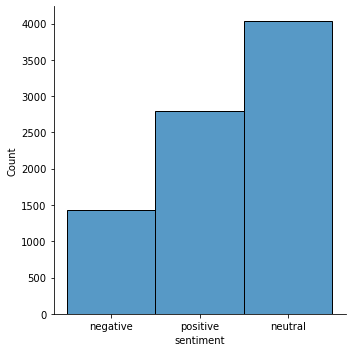

In [8]:
import seaborn as sns

sns.displot(train_df.sentiment)

In [ ]:
Мы видим, что почти половина новостей - нейтральные, на позитивные приходится треть и оставшиеся 17% на негативные

## Оценим распределение длительности предложений (текстов)

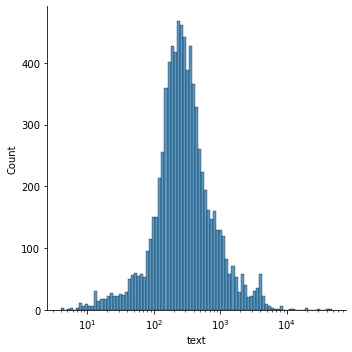

In [32]:
# токенизируем по пробелам

sns.displot(train_df.text.apply(lambda x: len(x.split())), log_scale=True)

In [ ]:
Распределение похоже на лог-нормальное

In [33]:
# токенизируем по пробелам

train_df.text.apply(lambda x: len(x.split())).describe()

count     8263.000000
mean       511.680867
std       1168.090775
min          4.000000
25%        164.000000
50%        271.000000
75%        481.000000
max      48146.000000
Name: text, dtype: float64

In [ ]:
Мы видим, что для без дополнительной обработки - для тяжелых моделей мы сможем взять только 77% обучающей выборки<br>
Посмотрим, поможет ли удаление пунктуации и стоп -слов

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexeyzapolskii/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
train_df.text

0       Досудебное расследование по факту покупки ЕНПФ...
1       Медики рассказали о состоянии пострадавшего му...
2       Прошел почти год, как железнодорожным оператор...
3       По итогам 12 месяцев 2016 года на территории р...
4       Астана. 21 ноября. Kazakhstan Today - Агентств...
                              ...                        
8258    Как мы писали еще весной, для увеличения сбыта...
8259    Но молодой министр национальной экономики Биши...
8260    \n \nВ ЕНПФ назначен новый председатель правле...
8261    В Алматы у отделения банка произошло нападение...
8262    НПП РК «Атамекен» предлагает создать Националь...
Name: text, Length: 8263, dtype: object

In [ ]:
1) Привести в lower-case
2) Убрать знаки пунктуации
3) Токенизация по словам
4) Стемминг/леммитизация
5) ..

## Punctuation Removal: 


In [23]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
train_df.head(2)

,text,id,sentiment
0,Досудебное расследование по факту покупки ЕНПФ...,1945,negative
1,Медики рассказали о состоянии пострадавшего му...,1957,negative


In [ ]:
уберем пунктуацию (знаки препинания)

In [56]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
train_df['clean_text']= train_df['text'].apply(lambda x:remove_punctuation(x))
train_df.head()

,text,id,sentiment,clean_text
0,Досудебное расследование по факту покупки ЕНПФ...,1945,negative,Досудебное расследование по факту покупки ЕНПФ...
1,Медики рассказали о состоянии пострадавшего му...,1957,negative,Медики рассказали о состоянии пострадавшего му...
2,"Прошел почти год, как железнодорожным оператор...",1969,negative,Прошел почти год как железнодорожным оператора...
3,По итогам 12 месяцев 2016 года на территории р...,1973,negative,По итогам 12 месяцев 2016 года на территории р...
4,Астана. 21 ноября. Kazakhstan Today - Агентств...,1975,negative,Астана 21 ноября Kazakhstan Today Агентство Р...


переведем в нижний регистр

In [57]:
train_df['clean_text']= train_df['clean_text'].apply(lambda x: x.lower())


In [58]:
train_df.head(3)

,text,id,sentiment,clean_text
0,Досудебное расследование по факту покупки ЕНПФ...,1945,negative,досудебное расследование по факту покупки енпф...
1,Медики рассказали о состоянии пострадавшего му...,1957,negative,медики рассказали о состоянии пострадавшего му...
2,"Прошел почти год, как железнодорожным оператор...",1969,negative,прошел почти год как железнодорожным оператора...


Токенизация

In [59]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

#applying function to the column
train_df['clean_text'] = train_df['clean_text'].apply(lambda x: x.split())

In [62]:
train_df.head(2)

,text,id,sentiment,clean_text
0,Досудебное расследование по факту покупки ЕНПФ...,1945,negative,"[досудебное, расследование, по, факту, покупки..."
1,Медики рассказали о состоянии пострадавшего му...,1957,negative,"[медики, рассказали, о, состоянии, пострадавше..."


## Stop word removal

In [12]:
#Stop words present in the library

from nltk.corpus import stopwords
from pymystem3 import Mystem



In [76]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [107]:
#Create lemmatizer and stopwords list
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

#Preprocess function
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in string.punctuation]
    
    text = " ".join(tokens)
    
    return text


In [19]:
train_df.loc[8261].text

'В Алматы у отделения банка произошло нападение со стрельбой Сегодня, 15:34 В Алматы у отделений банков на улице Тимирязева между улицами Маркова и Байтурсынова произошло нападение на двоих мужчин. Неизвестные с огнестрельным оружием пытались вырвать сумку у одного из них. Предположительно, мужчина вышел из банка с деньгами, сообщает Informburo.kz.   «Они сцепились, – говорит охранник здания на улице Тимирязева. – Те выстрелили в воздух, потом ударили одного из мужчин по голове пистолетом. Это его кровь на асфальте. Его увезла «скорая».   На месте работают криминалисты, территория оцеплена. В здании находятся отделения банков «ВТБ» и «Сбербанк».   Очевидец ЧП рассказал, что при пострадавшем был паспорт гражданина России.   Выстрелы были слышны у бизнес-центра «Алатау Гранд». Здесь находятся филиалы банка «ВТБ» и «Сбербанка». В пресс-службе «Сбербанка» сообщили, что пострадавший не является их клиентом. В «ВТБ» пообещали дать ответ позже. \n \n 25 октября в Алматы неизвестные напали на 

In [20]:
train_df.loc[8261].sentiment

'negative'

In [25]:
preprocess_text("По асфальту мимо цемента, Избегая зевак под аплодисменты. Обитатели спальных аррондисманов")


'асфальт мимо цемент избегать зевака аплодисменты обитатель спальный аррондисман'

In [26]:
preprocess_text(train_df.loc[8261].text)



'алматы отделение банк происходить нападение стрельба сегодня 15 34 алматы отделение банк улица тимирязево улица марков байтурсынов происходить нападение двое мужчина неизвестный огнестрельный оружие пытаться вырывать сумка предположительно мужчина выходить банка деньги сообщать informburo kz    « сцепляться , –  говорить охранник здание улица тимирязево  –  выстреливать воздух ударять мужчина голова пистолет это кровь асфальт увезти  « скорый » место работать криминалист территория оцеплять здание находиться отделение банк  « втб »   « сбербанк » очевидец чп рассказывать пострадать паспорт гражданин россия выстрел слышный бизнес-центр  « алатау гранд » находиться филиал банк  « втб »   « сбербанк » пресс-служба  « сбербанк »  сообщать пострадавший являться клиент  « втб »  пообещать давать ответ поздно 25 октябрь алматы неизвестный нападывать охранник  « банк центркредит »  завладевать оружие город объявлять спецплан  « сирена » полиция начинать досудебный расследование ст 192 ч 2 ук 

## Применим все шаги и получим токены:

In [29]:
train_df['tokenized'] = train_df.text.apply(lambda x: preprocess_text(x).split())

In [30]:
train_df

,text,id,sentiment,tokenized
0,Досудебное расследование по факту покупки ЕНПФ...,1945,negative,"[досудебный, расследование, факт, покупка, енп..."
1,Медики рассказали о состоянии пострадавшего му...,1957,negative,"[медик, рассказывать, состояние, пострадавший,..."
2,"Прошел почти год, как железнодорожным оператор...",1969,negative,"[проходить, год, железнодорожный, оператор, за..."
3,По итогам 12 месяцев 2016 года на территории р...,1973,negative,"[итог, 12, месяц, 2016, год, территория, респу..."
4,Астана. 21 ноября. Kazakhstan Today - Агентств...,1975,negative,"[астана, 21, ноябрь, kazakhstan, today, агентс..."
...,...,...,...,...
8258,"Как мы писали еще весной, для увеличения сбыта...",10312,positive,"[писать, весна, увеличение, сбыт, также, избег..."
8259,Но молодой министр национальной экономики Биши...,10313,negative,"[молодой, министр, национальный, экономика, би..."
8260,\n \nВ ЕНПФ назначен новый председатель правле...,10314,neutral,"[енпф, назначать, новый, председатель, правлен..."
8261,В Алматы у отделения банка произошло нападение...,10315,negative,"[алматы, отделение, банк, происходить, нападен..."


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
Векторизируем текст 

In [33]:
train_df

,text,id,sentiment,tokenized
0,Досудебное расследование по факту покупки ЕНПФ...,1945,negative,"[досудебный, расследование, факт, покупка, енп..."
1,Медики рассказали о состоянии пострадавшего му...,1957,negative,"[медик, рассказывать, состояние, пострадавший,..."
2,"Прошел почти год, как железнодорожным оператор...",1969,negative,"[проходить, год, железнодорожный, оператор, за..."
3,По итогам 12 месяцев 2016 года на территории р...,1973,negative,"[итог, 12, месяц, 2016, год, территория, респу..."
4,Астана. 21 ноября. Kazakhstan Today - Агентств...,1975,negative,"[астана, 21, ноябрь, kazakhstan, today, агентс..."
...,...,...,...,...
8258,"Как мы писали еще весной, для увеличения сбыта...",10312,positive,"[писать, весна, увеличение, сбыт, также, избег..."
8259,Но молодой министр национальной экономики Биши...,10313,negative,"[молодой, министр, национальный, экономика, би..."
8260,\n \nВ ЕНПФ назначен новый председатель правле...,10314,neutral,"[енпф, назначать, новый, председатель, правлен..."
8261,В Алматы у отделения банка произошло нападение...,10315,negative,"[алматы, отделение, банк, происходить, нападен..."


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [39]:
train_df['tokenized'] = train_df.text.apply(lambda x: preprocess_text(x))

In [40]:
train_df.head()

,text,id,sentiment,tokenized
0,Досудебное расследование по факту покупки ЕНПФ...,1945,negative,досудебный расследование факт покупка енпф пак...
1,Медики рассказали о состоянии пострадавшего му...,1957,negative,медик рассказывать состояние пострадавший мужч...
2,"Прошел почти год, как железнодорожным оператор...",1969,negative,проходить год железнодорожный оператор запреща...
3,По итогам 12 месяцев 2016 года на территории р...,1973,negative,итог 12 месяц 2016 год территория республика в...
4,Астана. 21 ноября. Kazakhstan Today - Агентств...,1975,negative,астана 21 ноябрь kazakhstan today агентство рк...


In [156]:
X = train_df.tokenized
y = train_df.sentiment

In [158]:
le = LabelEncoder()

y = le.fit_transform(y)

In [159]:
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [161]:
vectoriser = TfidfVectorizer()

X_train = vectoriser.fit_transform(X_train)
# Convert sparse matrix to dataframe
#X_train = pd.DataFrame.sparse.from_spmatrix(X_train)

# Transform to feature matrix
X_test = vectoriser.transform(X_test)
# Convert sparse matrix to dataframe
#X_test = pd.DataFrame.sparse.from_spmatrix(X_test)
# Add column names to make it more readible


In [116]:
X_train.shape, X_test.shape

((5536, 56071), (2727, 56071))

In [117]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Решение:
    увеличить кол-во итераций +
    стандартизовать/нормализовать данные
    
рассмотрим все варианты

In [162]:
lg = LogisticRegression(max_iter=10000)

In [163]:
lg.fit(X_train, y_train) # сошлось

LogisticRegression(max_iter=10000)

In [164]:
from sklearn.metrics import classification_report

In [165]:
print(classification_report(y_test, lg.predict(X_test))) #качество на тесте

              precision    recall  f1-score   support

           0       0.83      0.53      0.64       483
           1       0.69      0.81      0.75      1334
           2       0.73      0.69      0.71       910

    accuracy                           0.72      2727
   macro avg       0.75      0.68      0.70      2727
weighted avg       0.73      0.72      0.72      2727



В целом, качество на тесте - неплохое - 0.7 - 0.72

Сделаем инференс и отправим решение на кэгл и пойдем пить чай

для этого нужно восстановить весь пайплан и повторить его для теста

In [110]:
test_df.head()

,text,id,tokenized
0,"Как сообщает пресс-служба акимата Алматы, для ...",0,сообщать пресс-служба акимат алматы ликвидиция...
1,Казахстанские авиакомпании перевозят 250 тысяч...,1,казахстанский авиакомпания перевозить 250 тыся...
2,На состоявшемся под председательством Касым-Жо...,2,состояться председательство касым жомарт токае...
3,В ОАЭ состоялись переговоры между казахстанско...,3,оаэ состояться переговоры казахстанский эмират...
4,12 вагонов грузового поезда сошли с путей в Во...,4,12 вагон грузовой поезд сходить путь восточный...


In [166]:
test_df['tokenized'] = test_df.text.apply(lambda x: preprocess_text(x))

In [167]:

valid = vectoriser.transform(test_df['tokenized'])
# Convert sparse matrix to dataframe
#X_train = pd.DataFrame.sparse.from_spmatrix(X_train)




In [168]:
pred = lg.predict(valid)

In [169]:
pred.shape

(2056,)

In [170]:
pd.Series(pred).value_counts(1)

1    0.570525
2    0.329280
0    0.100195
dtype: float64

In [130]:
pd.read_csv('data/sample.csv')

,id,sentiment
0,0,neutral
1,1,positive
2,2,negative
3,3,positive
4,4,neutral


In [174]:
test_df.head()

,text,id,tokenized,sentiment
0,"Как сообщает пресс-служба акимата Алматы, для ...",0,сообщать пресс-служба акимат алматы ликвидиция...,positive
1,Казахстанские авиакомпании перевозят 250 тысяч...,1,казахстанский авиакомпания перевозить 250 тыся...,positive
2,На состоявшемся под председательством Касым-Жо...,2,состояться председательство касым жомарт токае...,neutral
3,В ОАЭ состоялись переговоры между казахстанско...,3,оаэ состояться переговоры казахстанский эмират...,positive
4,12 вагонов грузового поезда сошли с путей в Во...,4,12 вагон грузовой поезд сходить путь восточный...,negative


In [ ]:
test_df.sentiment = test_df.sentiment 

In [173]:
test_df['sentiment'] = le.inverse_transform(pred)

In [175]:
sub = test_df[['id', 'sentiment']]

In [183]:
sub.to_csv('data/submission_baseline.csv', index=False)

In [185]:
dff = pd.read_csv('data/submission_baseline.csv')

In [188]:
pd.read_csv('data/submission_baseline.csv').columns

Index(['id', 'sentiment'], dtype='object')

In [187]:
pd.read_csv('data/sample.csv').columns

Index(['id', 'sentiment'], dtype='object')

In [130]:
pd.read_csv('data/sample.csv')

,id,sentiment
0,0,neutral
1,1,positive
2,2,negative
3,3,positive
4,4,neutral


In [192]:
sub.head()

,id,sentiment
0,0,positive
1,1,positive
2,2,neutral
3,3,positive
4,4,negative


In [195]:
le.inverse_transform(pred)

array(['positive', 'positive', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [ ]:
sub_pred = softmax.predict(tfidf.transform([i['text'] for i in raw_test]))
sub_df = pd.DataFrame()
sub_df['id'] =  [i['id'] for i in raw_test]
sub_df['sentiment'] = sub_pred

In [196]:
sub_df = pd.DataFrame()
sub_df['id'] =  [i['id'] for i in test_df]

TypeError: string indices must be integers

In [199]:
test_df[['id', 'sentiment']].to_csv('tf_idf_log_reg.csv', index=False)

In [ ]:
print('accuracy', np.round(accuracy_score(y_holdout, lg.predict(X_holout)),3)) #качество на тесте
print('f1', np.round(f1_score(y_holdout, lg.predict(X_holout)),2)) #качество на тесте
print('roc_auc', np.round(roc_auc_score(y_holdout, lg.predict_proba(X_holout)[:,1]),3)) #качество на тесте
print('mcc',  np.round(matthews_corrcoef(y_holdout, lg.predict(X_holout)),3))

In [1]:
print(classification_report(y_test, lg.predict(X_test))) #качество на тесте

NameError: name 'classification_report' is not defined